<a href="https://colab.research.google.com/github/Pongpang-2102/Data-Science-Project-2022/blob/main/Puriwat_Project_Hotel_Booking_Analysis_PySpark%26DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework : PySpark DataFrame API 


Project Author : Puriwat Sangrawee

## Question 01

สร้าง Notebook ใหม่ใน Google Colab แล้วลง PySpark ด้วยคำสั่ง !pip install pyspark สร้าง SparkSession ให้เรียบร้อย

In [1]:
# 1.1 start with pip install 
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 199 kB 63.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=86990c77ebea30572b5a7eb25d3156e96a0f7d27628aeca6c944b9fa1407b30a
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
# 1.2 impoort Spark Session
from pyspark.sql import SparkSession

In [3]:
# 1.3 create a spark session
spark = SparkSession.builder.appName('Puriwat_Homework_PySpark&DataViz').getOrCreate()

## Question 02

เปิดไฟล์ `hotel_booking.csv` เข้ามาเป็น DataFrame โดยแถวแรกของไฟล์จะเป็น header ให้ PySpark ประเมิน
Schema ของไฟล์เอง แล้วแสดงจำนวนแถวกับคอลัมน์ของตาราง

In [4]:
# 2.1 import csv file : hotel_booking.csv / using InferSchema to command Pyspark evaluate schema automatically 
hotel_booking_df = spark.read.csv('/content/drive/MyDrive/##ku_int_ds2022/hotel_bookings.csv',header=True, inferSchema=True)

In [5]:
# 2.2 to view our defined schema 
hotel_booking_df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

In [6]:
# 2.3 to view data in our otel_booking_df partially
hotel_booking_df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|to

In [7]:
# 2.4 to view number of rows and column in our dataframe (hotel_booking_df) we will use

print("Our hotel_booking_df info"
      "\nnumber of row (records) =",hotel_booking_df.count(),
      "\nnumber of column        =",len(hotel_booking_df .columns) )

Our hotel_booking_df info
number of row (records) = 119390 
number of column        = 32


## Question 03

แสดงข้อมูล 5 แถวแรกของตารางและคอลัมน์ชื่อ arrival_date_year, arrival_date_month และ
arrival_date_day_of_month

In [8]:
#  to view data only the first 5 rows only in specified column ()
# arrival_date_year, arrival_date_month และ arrival_date_day_of_month

hotel_booking_df[ ['arrival_date_year',
                   'arrival_date_month',
                   'arrival_date_day_of_month']    ].show(5)   

# it can solve for Question 3

+-----------------+------------------+-------------------------+
|arrival_date_year|arrival_date_month|arrival_date_day_of_month|
+-----------------+------------------+-------------------------+
|             2015|              July|                        1|
|             2015|              July|                        1|
|             2015|              July|                        1|
|             2015|              July|                        1|
|             2015|              July|                        1|
+-----------------+------------------+-------------------------+
only showing top 5 rows



## Question 04

ลูกค้าที่จองล่วงหน้า (lead_time) มากกว่า 365 วันมีกี่ราย

In [9]:
# to summarize statistics using : agg()

# 1. starting with  import function as F
import pyspark.sql.functions as F

In [10]:
# filter only lead time > 365 --> count and show data
hotel_booking_in_adv_365 = hotel_booking_df[   hotel_booking_df.lead_time > 365       ].count()
print("the number of customer who make a hotel reservation over 365 day in advance = ",hotel_booking_in_adv_365) # it can solve for Question 4

the number of customer who make a hotel reservation over 365 day in advance =  3148


## Question 05

ลูกค้าที่จองห้องต่อเนื่องทั้งวันธรรมดา (stays_in_week_nights) และวันสุดสัปดาห์ (stays_in_weekend_nights) มีกี่ราย


In [11]:
hotel_booking_conti = hotel_booking_df.filter(  ( hotel_booking_df.stays_in_week_nights > 0 )  & (hotel_booking_df.stays_in_weekend_nights > 0   )             ).count()
hotel_booking_conti
print("the number of customer who make a reservation from week night to weekend night = ",hotel_booking_conti) # it can solve for Question 5

the number of customer who make a reservation from week night to weekend night =  60462


## Question 06

คอลัมน์ children เป็นประเภท string เพราะมีคำว่า “NA” อยู่ ให้เปลี่ยนคำว่า NA ให้เป็น 0

In [12]:
# 6.1 to ensure that above passange is correct (children col =  String)
# we must to check data type of children column
hotel_booking_df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

In [13]:
# 6.2 run this command to ask a permission to run data as SQL-style
hotel_booking_df.createOrReplaceTempView('hotel_booking_df')

In [14]:
# 6.3  before update data / try to verify remained "NA" on col children 
spark.sql('SELECT count(children)\
           FROM hotel_booking_df\
           WHERE children == "NA"').show() 

+---------------+
|count(children)|
+---------------+
|              4|
+---------------+



In [15]:
spark.sql('SELECT children\
           FROM hotel_booking_df\
           WHERE children == "NA"').show() 

+--------+
|children|
+--------+
|      NA|
|      NA|
|      NA|
|      NA|
+--------+



In [16]:
# 6.4 Replace "NA" with 0 and show the new data 
chldren_wo_na_df = \
hotel_booking_df.\
select(
    F.when (hotel_booking_df.children == "NA",0).\
    otherwise(hotel_booking_df.children).\
    alias('Children')
             
     ) 

chldren_wo_na_df.show(5)

+--------+
|Children|
+--------+
|       0|
|       0|
|       0|
|       0|
|       0|
+--------+
only showing top 5 rows



In [17]:
# 6.5 run this command to ask a permission to run data as SQL-style
chldren_wo_na_df.createOrReplaceTempView('chldren_wo_na_df')

In [18]:
# 6.6  after data has been updated / try to verify remained "NA" again
spark.sql('SELECT count(children) AS No_of_children \
           FROM chldren_wo_na_df\
           WHERE children == "NA"').show() 

+--------------+
|No_of_children|
+--------------+
|             0|
+--------------+



In [19]:
# 6.7 try to check data type of our new children column
chldren_wo_na_df.printSchema()
# It was still be "String"

root
 |-- Children: string (nullable = true)



In [20]:
# 6.8 Using "cast" to change data type from string to integer and show result
children_wo_na_df_int = \
        chldren_wo_na_df.\
                withColumn("children",
                           F.col('children').cast('int'))

children_wo_na_df_int.show()

+--------+
|children|
+--------+
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
|       1|
|       0|
|       0|
|       0|
|       0|
|       0|
|       0|
+--------+
only showing top 20 rows



In [21]:
# 6.9 try to check datta type of our new children again
children_wo_na_df_int.printSchema()
# from 6.8 and 6.9 : our data has been changed from "NA (str)" to 0 (int) already 

root
 |-- children: integer (nullable = true)



## Question 07

หาค่าเฉลี่ยของคอลัมน์จำนวนเด็ก (children)

In [22]:
import pyspark.sql

In [23]:
from pyspark.sql.functions import sum, max, min, avg, count, mean ,round

In [24]:
hotel_booking_df.\
   agg(   round( F.mean("children"),3).alias('average_no_of_children')   )\
   .show() # it can solve for Question 7

+----------------------+
|average_no_of_children|
+----------------------+
|                 0.104|
+----------------------+



ซึ่งสามารถใช้วิธีการ query แบบเดียวกับ SQL ได้ด้วยเช่นกัน ตามตัวอย่างด้านล่าง

In [25]:
# run this command to ask a permission to run data as SQL-style
hotel_booking_df.createOrReplaceTempView('hotel_booking_df')

In [26]:
spark.sql('SELECT ROUND(AVG(children),3) AS Average_No_of_children \
           FROM hotel_booking_df').show()  # it can solve for Question 7

+----------------------+
|Average_No_of_children|
+----------------------+
|                 0.104|
+----------------------+



## Question 08

ผู้จองโรงแรมมาจากกี่่ประเทศ (country) (นับจำนวนประเทศที่ไม่ซ้ำ)

In [27]:
spark.sql('SELECT COUNT(DISTINCT(country)) AS No_of_Customer_Country\
            FROM hotel_booking_df').show() # it can solve for Question 8

+----------------------+
|No_of_Customer_Country|
+----------------------+
|                   178|
+----------------------+



## Question 09

นับจำนวนผู้จองแยกตามโรงแรม (hotel)

In [28]:
# to count hotel_booker based on hotel category
hotel_booking_df.groupby('hotel').\
                 agg(   F.count("hotel").alias('No_of_customers')  ).\
                 sort('No_of_customers',ascending = False).show() # it can solve for Question 9

+------------+---------------+
|       hotel|No_of_customers|
+------------+---------------+
|  City Hotel|          79330|
|Resort Hotel|          40060|
+------------+---------------+



## Question 10

นับจำนวนผู้จองแยกตามประเทศ (country) เรียงตามลำดับจากมากไปน้อย แสดงแค่ 5 ประเทศแรก

In [29]:
hotel_booking_df.\
     groupby('country').\
     agg(   F.count("country").alias('No_of_customers')   ).\
     sort('No_of_customers',
          ascending = False).show(5)  # it can solve for Question 10

+-------+---------------+
|country|No_of_customers|
+-------+---------------+
|    PRT|          48590|
|    GBR|          12129|
|    FRA|          10415|
|    ESP|           8568|
|    DEU|           7287|
+-------+---------------+
only showing top 5 rows



## Question 11

หาค่าเฉลี่ยของจำนวนวันที่จองล่วงหน้า (lead_time) แยกตามประเภทลูกค้า (customer_type)

In [30]:
hotel_booking_df.groupby('customer_type').\
    agg(   
       round(F.avg("lead_time"),3). \
                               alias('average_lead_time (days)')   
       ).\
    sort('average_lead_time (days)',
         ascending = False).show()    # it can solve for Question 11

+---------------+------------------------+
|  customer_type|average_lead_time (days)|
+---------------+------------------------+
|       Contract|                  142.97|
|Transient-Party|                 137.037|
|      Transient|                  93.296|
|          Group|                  55.057|
+---------------+------------------------+



## Question 12 

สร้างคอลัมน์ใหม่ชื่อ `arrival_date` ที่เก็บ timestamp ของวันที่ผู้เข้าพักมาถึงโรงแรม

Hint : arrival_date_year ,arrival_date_month และ arrival_date_day_of_month concatnate with "- " and change it to timestamp

In [31]:
# 12.1 start with review schema 
hotel_booking_df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

In [32]:
# 12.2 to cast a new column bu changing from integer to string
hotel_booking_df = hotel_booking_df.withColumn("arrival_date_year",
                                               F.col("arrival_date_year").cast("string"))
hotel_booking_df = hotel_booking_df.withColumn("arrival_date_day_of_month",
                                               F.col("arrival_date_day_of_month").cast("string"))

In [33]:
# 12.3 confirm this change by printSchema()
hotel_booking_df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: string (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: string (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable

In [34]:
# 12.4 start by creat a new column  named arrival_date
# to place it as last col at hotel_booking_df
hotel_booking_df = \
hotel_booking_df.\
    withColumn('arrival_date_zero' ,
                   F.concat(
                        hotel_booking_df.arrival_date_year,F.lit('-'),
                        hotel_booking_df.arrival_date_month,F.lit('-'),
                        hotel_booking_df.arrival_date_day_of_month     
                           )   
              )
 
hotel_booking_df.show(3)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+-----------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_car_par

In [35]:
# 12.5 create a new col (arrival_date) from existed column (arrival_date_zero)

hotel_booking_df = \
hotel_booking_df.\
    withColumn('arrival_date' ,
                   F.to_timestamp(
                       hotel_booking_df.arrival_date_zero, 
                       'yyyy-MMMM-d' 
                                 )
                       )
     

In [36]:
# 12.6 to check our newly created column named arrival_date 

#It is string type (cuurrently)
hotel_booking_df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: string (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: string (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable

In [37]:
# 12.7 remove an unneccessary column & show all in our table
hotel_booking_df.drop(
    F.col('arrival_date_zero')
                     ).show(5)   # it can solve for Question 12


+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+-------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_car_p

## Question 13

สรุปจำนวนผู้เข้าพักที่มาถึงโรงแรมในแต่ละวัน ให้ใช้คอลัมน์ arrival_date ในการระบุวันมาถึง ไม่นับลูกค่าที่ไม่มา
(is_canceled เป็น 1) เรียงลำดับตามวันที่เข้าพัก

In [38]:
# 13.1 use data from Question 12 to group & filter and then show only top 10 customers

hotel_book_wo_canceled = \
hotel_booking_df.filter( hotel_booking_df.is_canceled == 0 ).\
                 groupby('arrival_date').\
                 agg(F.count( 
                              hotel_booking_df.arrival_date).\
                              alias('Number_of_customers')
                     ).\
                 sort('arrival_date',
                      ascending = True)
            

hotel_book_wo_canceled.show(10)
 # it can solve for Question 13

+-------------------+-------------------+
|       arrival_date|Number_of_customers|
+-------------------+-------------------+
|2015-07-01 00:00:00|                103|
|2015-07-02 00:00:00|                 36|
|2015-07-03 00:00:00|                 37|
|2015-07-04 00:00:00|                 45|
|2015-07-05 00:00:00|                 37|
|2015-07-06 00:00:00|                 41|
|2015-07-07 00:00:00|                 29|
|2015-07-08 00:00:00|                 45|
|2015-07-09 00:00:00|                 29|
|2015-07-10 00:00:00|                 42|
+-------------------+-------------------+
only showing top 10 rows



## Question 14 

แสดงจำนวนการจองรายเดือนแยกตามโรงแรม (hotel) ให้ใช้คอลัมน์ arrival_date เป็นหลักในการตัดสินใจว่าการ
จองเกิดขึ้นในเดือนไหน (ระวังว่า ต้องสรุปข้อมูลตามช่วงเวลาหนึ่งเดือน ไม่ได้สรุปข้อมูลเดือนที่ชื่อเหมือนกันแต่คน
ละปี)

In [39]:
# 14.1 start with creat a new column named year_month arrilval
hotel_booking_df = \
hotel_booking_df.\
      withColumn('year_month_arrival',
                       F.date_format(
                           hotel_booking_df.arrival_date ,
                           'yyyy-MM'
                                    )
                                        )


In [40]:
hotel_booking_df.show(10)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+-----+---------------------------+-------------------------+------------------+-----------------------+-----------------+-------------------+------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_

In [41]:
# 14.2 to view only year-month info

hotel_booking_yr_mo_df = \
hotel_booking_df.\
        groupby('hotel','year_month_arrival').\
        agg(F.count( 
                    hotel_booking_df.year_month_arrival).\
                              alias('Monthly_customer_No')\
            ). \
        sort( ['year_month_arrival','Monthly_customer_No'],
              ascending = [ True , False]
            )
             
hotel_booking_yr_mo_df.show(10)
 # it can solve for Question 14


+------------+------------------+-------------------+
|       hotel|year_month_arrival|Monthly_customer_No|
+------------+------------------+-------------------+
|  City Hotel|           2015-07|               1398|
|Resort Hotel|           2015-07|               1378|
|  City Hotel|           2015-08|               2480|
|Resort Hotel|           2015-08|               1409|
|  City Hotel|           2015-09|               3529|
|Resort Hotel|           2015-09|               1585|
|  City Hotel|           2015-10|               3386|
|Resort Hotel|           2015-10|               1571|
|  City Hotel|           2015-11|               1235|
|Resort Hotel|           2015-11|               1105|
+------------+------------------+-------------------+
only showing top 10 rows



## Question 15

สรุปจำนวนผู้เข้าพักที่มาถึงโรงแรมในแต่ละวันรวมย้อนหลังไป 6 วัน นั่นคือแถวที่แสดงวันที่ 2017-03-07 จะบวก
รวมจำนวนผู้เข้าพักตั้งแต่วันที่ 2017-03-07 ย้อนไปจนถึง 2017-03-01 ให้ใช้คอลัมน์ arrival_date ในการระบุวันมาถึง ไม่นับลูกค้าที่ไม่มา (is_canceled เป็น 1)

Remark : ข้อนี้ควรใช้ Window Function

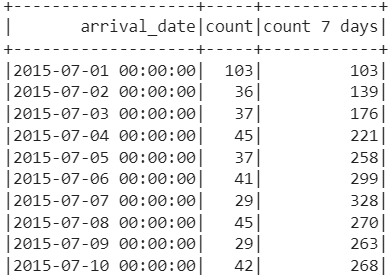

In [65]:
# 15.1 import window function
# window function will assist to  split data by time difference
from pyspark.sql import Window

In [66]:
# 15.2 select only confirmed order -- > group it by arrival date and count -->
#  sort that total numbers of booking order in each arrival date in ascending order
daily_count_df = hotel_booking_df.filter('is_canceled = 0').\
                                  groupby('arrival_date').\
                                  count().\
                                  sort('arrival_date')

In [67]:
# 15.3 create a new object using window function + rowsBetween

## 15.3.1 using window function to group data by duration (from time to time)
## 15.3.2 using orderBy() ( in window()  ) to create a new window
##        by ordering data by specified column( this case is 'arrival_date')
## 15.3.3 using row between to create a sub-table from row index
##        previously new window has been created from data from arrival date and from our assignment ,
##        6 day backward data is needed , so we need to create a new subfolder using  -6 

window_7days = Window.orderBy('arrival_date').rowsBetween(-6, Window.currentRow)



In [72]:
# 15.4 select column arrival date, count , and count for 7 days 
#      (and rename our newly created coulumn to be easier to understand as 'cout 7 days' )
daily_count_weekly_report = daily_count_df.\
                            select('arrival_date', 'count', F.sum('count').over(window_7days).\
                                                                        alias('count 7 days'))

In [74]:
#15.5 show our summary from article 15.4 by show the first 10 days
daily_count_weekly_report.show(10)

+-------------------+-----+------------+
|       arrival_date|count|count 7 days|
+-------------------+-----+------------+
|2015-07-01 00:00:00|  103|         103|
|2015-07-02 00:00:00|   36|         139|
|2015-07-03 00:00:00|   37|         176|
|2015-07-04 00:00:00|   45|         221|
|2015-07-05 00:00:00|   37|         258|
|2015-07-06 00:00:00|   41|         299|
|2015-07-07 00:00:00|   29|         328|
|2015-07-08 00:00:00|   45|         270|
|2015-07-09 00:00:00|   29|         263|
|2015-07-10 00:00:00|   42|         268|
+-------------------+-----+------------+
only showing top 10 rows



## Question 16

เปิดไฟล์ชื่อ ISO3166.csv ซึ่งมีรหัสประเทศ 3 ตัวอักษรกับชื่อประเทศ แสดงรหัสประเทศที่ `มีในตารางแต่ไม่มีในไฟล์
ISO3166.csv` (คำใบ้: มี 3 รหัส) ก่อน join ให้เปลี่ยนชื่อคอลัมน์ของตารางจากไฟล์ ISO3166.csv ก่อนให้ชื่อ
คอลัมน์ของรหัสประเทศตรงกัน

In [43]:
# 16.1 Starting with upload file to specified path
iso_3166_df = spark.read.csv('/content/drive/MyDrive/##ku_int_ds2022/ISO3166.csv',
                             header=True, 
                             inferSchema=True)

In [44]:
# 16.2 to view our defined schema 
iso_3166_df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Alpha_2_code: string (nullable = true)
 |-- Alpha_3_code: string (nullable = true)
 |-- Numeric: integer (nullable = true)



In [45]:
# 16.3 to view data in our iso_3166_df partially
iso_3166_df.show(5)

+--------------+------------+------------+-------+
|       Country|Alpha_2_code|Alpha_3_code|Numeric|
+--------------+------------+------------+-------+
|   Afghanistan|          AF|         AFG|      4|
|       Albania|          AL|         ALB|      8|
|       Algeria|          DZ|         DZA|     12|
|American Samoa|          AS|         ASM|     16|
|       Andorra|          AD|         AND|     20|
+--------------+------------+------------+-------+
only showing top 5 rows



In [46]:
# 16.4 run this command to ask a permission to run data as SQL-style
iso_3166_df.createOrReplaceTempView('iso_3166_df')

In [47]:
# 16.5.1 from given hint : we will check the number of country from our data 
# both from iso_3166_df & hotel_booking_df

# starting with iso_3166_df
spark.sql('SELECT COUNT(DISTINCT(Alpha_2_code)) \
                            AS N_Cus_Country_ISO3166\
            FROM iso_3166_df').show()

+---------------------+
|N_Cus_Country_ISO3166|
+---------------------+
|                  248|
+---------------------+



In [48]:
# 16.5.2 check the number of country from  hotel_booking_df # same with Q8 previously
spark.sql('SELECT COUNT(DISTINCT(country)) \
                        AS N_cus_Country_Hotel_BK\
            FROM hotel_booking_df').show() 

+----------------------+
|N_cus_Country_Hotel_BK|
+----------------------+
|                   178|
+----------------------+



In [49]:
# 16.6 rename column : Alpha_2_code in iso_3166_df
# we will use this column to join with hotel_booking_df

iso_3166_df = iso_3166_df.withColumnRenamed('Country','Full_country_name') 

In [50]:
iso_3166_df = iso_3166_df.withColumnRenamed('Alpha_3_code','country') 
iso_3166_df.show(5)
# Pls be noted that 'Country' - (Start with  uppercase) -> Country full name
# but 'country' - (all lowercase) -> Alpla_3_code previously ########

+-----------------+------------+-------+-------+
|Full_country_name|Alpha_2_code|country|Numeric|
+-----------------+------------+-------+-------+
|      Afghanistan|          AF|    AFG|      4|
|          Albania|          AL|    ALB|      8|
|          Algeria|          DZ|    DZA|     12|
|   American Samoa|          AS|    ASM|     16|
|          Andorra|          AD|    AND|     20|
+-----------------+------------+-------+-------+
only showing top 5 rows



In [51]:
# 16.4 run this command to ask a permission to run data as SQL-style
iso_3166_df.createOrReplaceTempView('iso_3166_df')

In [52]:
# 16.7 to prove that given hint is correct (3 code )
spark.sql('SELECT \
               hotel_booking_df.country, \
               COUNT(DISTINCT(hotel_booking_df.country)) \
                                              N_country \
           FROM hotel_booking_df \
           LEFT JOIN iso_3166_df \
           ON hotel_booking_df.country = iso_3166_df.COUNTRY\
           WHERE iso_3166_df.Full_country_name IS NULL AND \
                 hotel_booking_df.country  IS NOT NULL \
           GROUP BY hotel_booking_df.country '
           ).show(100)  

# it can solve for Question 11

+-------+---------+
|country|N_country|
+-------+---------+
|     CN|        1|
|    TMP|        1|
|   NULL|        1|
+-------+---------+



## Question 17

ให้นำชื่อประเทศที่ตรงกับรหัสประเทศของผู้เข้าพักมาเพิ่มเป็นคอลัมน์ใหม่ในตารางโดย `คงแถวของตารางการจองไว้`

ตามความเข้าใจคือ :  ให้ join table ISO โดยโชว์แค่คอลัมน์เดียว แล้ว add ไปให้อยู่ตรง hotel_booking ถาวร

In [53]:
# 17.1 view old data
hotel_booking_df.show(3)

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+-----------------+-------------------+------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_l

In [54]:
# 17.2 to view data in column-added table in hotel_booking_df 
hotel_booking_fullCT_df = \
spark.sql(
    'SELECT \
               hotel_booking_df.* ,\
               iso_3166_df.Full_country_name \
           FROM hotel_booking_df \
           JOIN iso_3166_df \
           ON hotel_booking_df.country = iso_3166_df.country '

)
hotel_booking_fullCT_df.show(3) # it can solve for Question 17

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+----+---------------------------+-------------------------+------------------+-----------------------+--------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type| adr|required_car_

In [55]:
hotel_booking_fullCT_df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

## Question 18

พล็อตกราฟแสดง Boxplot ของจำนวนวันที่จองล่วงหน้า (lead_time) แยกตามประเภทลูกค้า (customer_type)

In [56]:
# 18.1 Starting with import Libarary for Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
# 18.2  create a pandas_dataframe before use it to create a boxplot
hotel_booking_pandas_df = hotel_booking_df.toPandas()

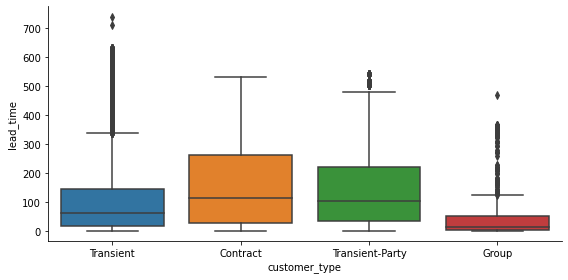

In [58]:
# 18.3 create a Boxplot : 

sns.catplot( data = hotel_booking_pandas_df , 
            x = 'customer_type' , 
            y = 'lead_time', 
            kind = 'box' , 
            height = 4  , aspect = 2)

## Question 19 

พล็อตกราฟเส้นแสดงข้อมูลจำนวนผู้เข้าพักรายเดือนแยกสีของเส้นตามโรงแรม (hotel) ใช้ข้อมูลจากข้อ 14 มา
พล็อตได้

In [59]:
# 19.1 to view summary table from answer@Question 14
hotel_booking_yr_mo_df.show(10)

+------------+------------------+-------------------+
|       hotel|year_month_arrival|Monthly_customer_No|
+------------+------------------+-------------------+
|  City Hotel|           2015-07|               1398|
|Resort Hotel|           2015-07|               1378|
|  City Hotel|           2015-08|               2480|
|Resort Hotel|           2015-08|               1409|
|  City Hotel|           2015-09|               3529|
|Resort Hotel|           2015-09|               1585|
|  City Hotel|           2015-10|               3386|
|Resort Hotel|           2015-10|               1571|
|  City Hotel|           2015-11|               1235|
|Resort Hotel|           2015-11|               1105|
+------------+------------------+-------------------+
only showing top 10 rows



In [60]:
# 19.2  create a pandas_dataframe before use it to create a line plot
hotel_booking_yr_mo_pandas_df = hotel_booking_yr_mo_df.toPandas()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

<Figure size 1080x576 with 0 Axes>

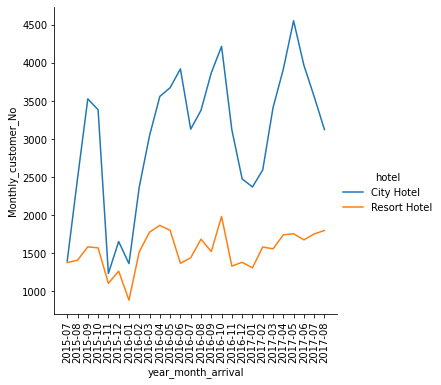

In [76]:
#  19.3 create a line plot
plt.figure(figsize = (15,8))
sns.relplot(data = hotel_booking_yr_mo_pandas_df, 
            x = 'year_month_arrival' ,y = 'Monthly_customer_No' ,
            hue = 'hotel' ,   kind = 'line' 
            )
plt.xticks(rotation=90)


## Question 20 

พล็อต histogram แสดงการกระจายตัวของจำนวนผู้เข้าพักในหนึ่งวัน (นำมาจากตารางที่คำนวณในข้อ 13 ได้)

In [62]:
# 20.1 Start with finding maximum number of customer
# this data will be used to define bin in histogram

hotel_book_wo_canceled = \
hotel_booking_df.filter( hotel_booking_df.is_canceled == 0 ).\
                 groupby('arrival_date').\
                 agg(F.count( 
                              hotel_booking_df.arrival_date).\
                              alias('Number_of_customers')
                     ).\
                 sort('Number_of_customers',
                       ascending = False)
            

hotel_book_wo_canceled.show(3)

+-------------------+-------------------+
|       arrival_date|Number_of_customers|
+-------------------+-------------------+
|2015-12-05 00:00:00|                255|
|2016-06-24 00:00:00|                220|
|2016-05-26 00:00:00|                213|
+-------------------+-------------------+
only showing top 3 rows



In [63]:
# 20.2 create a pandas dataframe before use it to for creating a hitogram
hotel_comer_pandas_df = hotel_book_wo_canceled.toPandas()

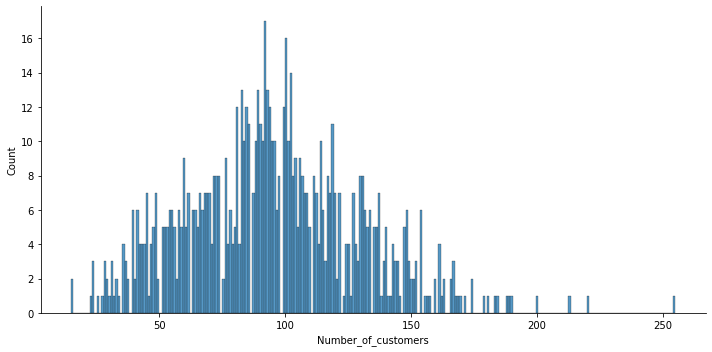

In [64]:
#  20.3  plot our histogram using seaborn library
sns.displot(hotel_comer_pandas_df, 
            x = 'Number_of_customers' , 
            # and y would be number of days 
            bins = 260, height = 5 , aspect = 2)

 # it can solve for Question 20